<a href="https://colab.research.google.com/github/cjy-sc11/2025_machine_learning/blob/main/AS3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

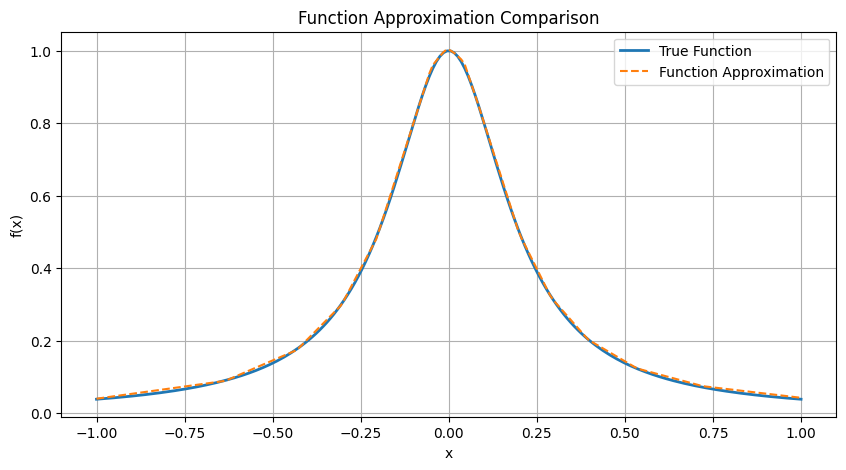

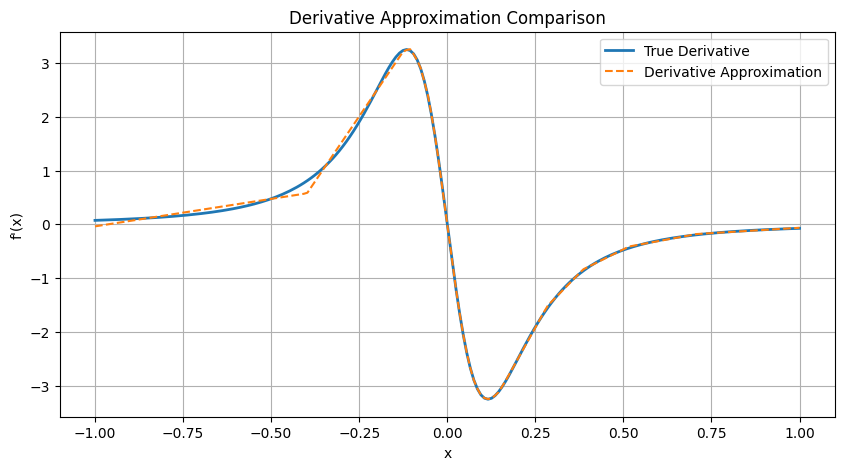

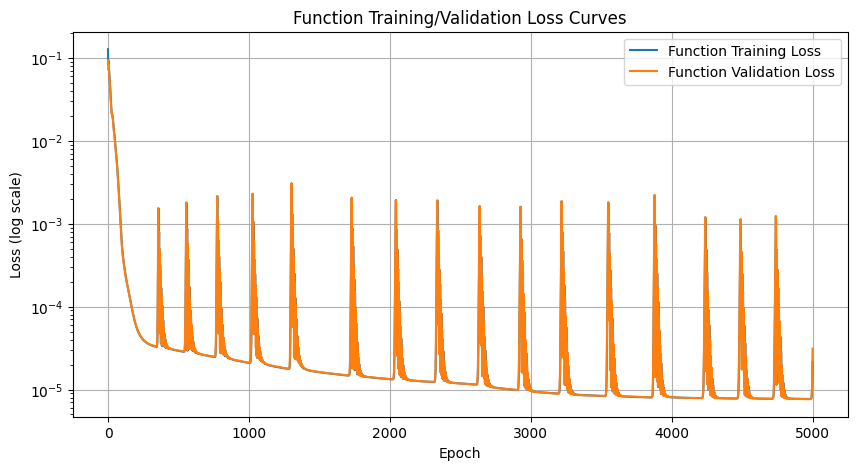

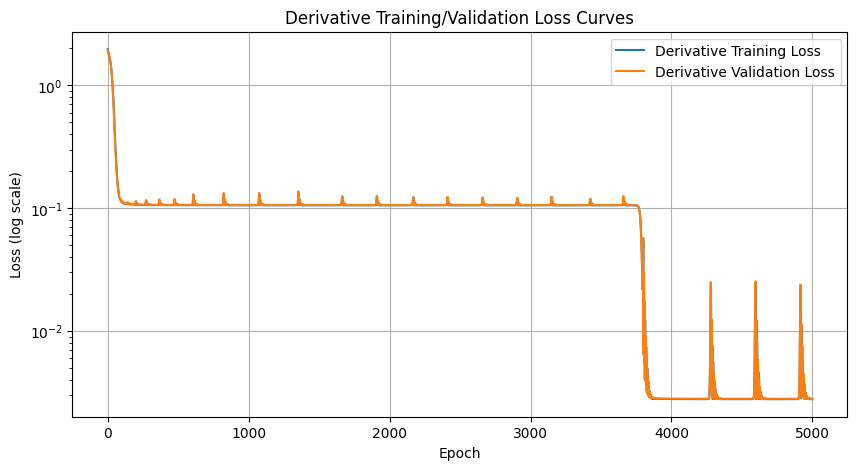

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 生成數據
x_train = torch.linspace(-1, 1, 1000).view(-1, 1)
y_train = 1 / (1 + 25 * x_train**2)
y_prime_train = (-50 * x_train) / (1 + 25 * x_train**2)**2  # 新增導數真值

x_val = torch.linspace(-1, 1, 200).view(-1, 1)
y_val = 1 / (1 + 25 * x_val**2)
y_prime_val = (-50 * x_val) / (1 + 25 * x_val**2)**2  # 新增導數真值

# 定義兩個獨立網路
class Net_func(torch.nn.Module):  # 原函數逼近網路
    def __init__(self):
        super(Net_func, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 1)
        )
    def forward(self, x):
        return self.layers(x)

class Net_deriv(torch.nn.Module):  # 新增導數逼近網路
    def __init__(self):
        super(Net_deriv, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 1)
        )
    def forward(self, x):
        return self.layers(x)

# 初始化模型與優化器
model_func = Net_func()
model_deriv = Net_deriv()
criterion = torch.nn.MSELoss()
optimizer_func = torch.optim.Adam(model_func.parameters(), lr=0.01)
optimizer_deriv = torch.optim.Adam(model_deriv.parameters(), lr=0.01)

# 訓練過程
train_loss_func, val_loss_func = [], []
train_loss_deriv, val_loss_deriv = [], []

for epoch in range(5000):
    # 訓練原函數網路
    y_pred_func = model_func(x_train)
    loss_func = criterion(y_pred_func, y_train)

    optimizer_func.zero_grad()
    loss_func.backward()
    optimizer_func.step()

    # 訓練導數網路
    y_pred_deriv = model_deriv(x_train)
    loss_deriv = criterion(y_pred_deriv, y_prime_train)

    optimizer_deriv.zero_grad()
    loss_deriv.backward()
    optimizer_deriv.step()

    # 驗證集評估
    with torch.no_grad():
        val_pred_func = model_func(x_val)
        v_loss_func = criterion(val_pred_func, y_val)

        val_pred_deriv = model_deriv(x_val)
        v_loss_deriv = criterion(val_pred_deriv, y_prime_val)

    # 記錄損失
    train_loss_func.append(loss_func.item())
    val_loss_func.append(v_loss_func.item())
    train_loss_deriv.append(loss_deriv.item())
    val_loss_deriv.append(v_loss_deriv.item())

# 預測結果
with torch.no_grad():
    y_pred_func = model_func(x_val).numpy()
    y_pred_deriv = model_deriv(x_val).numpy()

# 圖一：函數擬合對比（保持原圖）
plt.figure(figsize=(10, 5))
plt.plot(x_val.numpy(), y_val.numpy(), label='True Function', linewidth=2)
plt.plot(x_val.numpy(), y_pred_func, '--', label='Function Approximation')
plt.title('Function Approximation Comparison')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 圖二：導數擬合對比（新增）
plt.figure(figsize=(10, 5))
plt.plot(x_val.numpy(), y_prime_val.numpy(), label="True Derivative", linewidth=2)
plt.plot(x_val.numpy(), y_pred_deriv, '--', label='Derivative Approximation')
plt.title('Derivative Approximation Comparison')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

# 圖三：訓練曲線-函數（保持原圖）
plt.figure(figsize=(10, 5))
plt.semilogy(train_loss_func, label='Function Training Loss')
plt.semilogy(val_loss_func, label='Function Validation Loss')
plt.title('Function Training/Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True)
plt.show()

# 圖四：訓練曲線-導數（新增）
plt.figure(figsize=(10, 5))
plt.semilogy(train_loss_deriv, label='Derivative Training Loss')
plt.semilogy(val_loss_deriv, label='Derivative Validation Loss')
plt.title('Derivative Training/Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True)
plt.show()
